**LIBRARIES**

In [1]:
import numpy as np                                  # manipulate the image shape
import matplotlib.pyplot as plt                     # plot the image
from sklearn.datasets import fetch_olivetti_faces   # face data set (400 faces image)
from sklearn import decomposition                   # PCA
from skimage.util import random_noise               # adding noise to image

**DATA SET**

Olivetti Faces: https://scikit-learn.org/stable/datasets/real_world.html#olivetti-faces-dataset

In [2]:
faces = fetch_olivetti_faces()

In [3]:
type(faces)

sklearn.utils.Bunch

In [4]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [6]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [7]:
print('faces.images:', faces.images.shape)
print('faces.data:', faces.data.shape)

faces.images: (400, 64, 64)
faces.data: (400, 4096)


**PREVIEW THE IMAGES**

`faces.images`

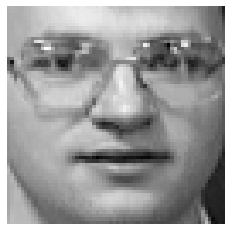

In [8]:
plt.imshow(faces.images[50], cmap='gray')
plt.axis('off')
plt.show()

`faces.data`

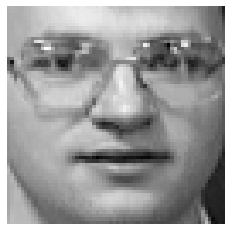

In [9]:
plt.imshow(np.reshape(faces.data[50], (64,64)), cmap='gray')
plt.axis('off')
plt.show()

`faces.images` and `faces.data` are the same.

**ADD NOISE**

https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise

In [10]:
facesNoise = random_noise(faces.data, mode='gaussian', var=0.005)

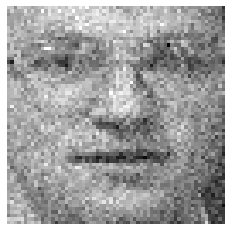

In [11]:
plt.imshow(np.reshape(facesNoise[50], (64,64)), cmap='gray')
plt.axis('off')
plt.show()

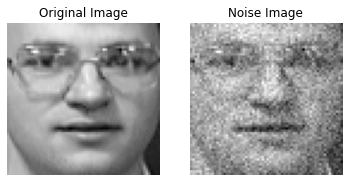

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].set_title('Original Image')
ax[0].imshow(np.reshape(faces.data[50], (64,64)), cmap='gray')
ax[0].axis('off')

ax[1].set_title('Noise Image')
ax[1].imshow(np.reshape(facesNoise[50], (64,64)), cmap='gray')
ax[1].axis('off')

plt.show()

**PCA: REDUCE THE NUMBER OF FEATURES**

In [13]:
facesNoise.shape

(400, 4096)

`400`: samples `4096`: features

In [23]:
pca = decomposition.PCA(n_components=40)

In [24]:
pca.fit(facesNoise)

PCA(n_components=40)

In [25]:
pcaFaces = pca.transform(facesNoise)

In [26]:
pcaFaces.shape

(400, 40)

`400`: samples `40`: features

**PCA: FACE RECONSTRUCTION (IMAGE DENOISING)**

In [27]:
facesRecons = pca.inverse_transform(pcaFaces)

In [28]:
facesRecons.shape

(400, 4096)

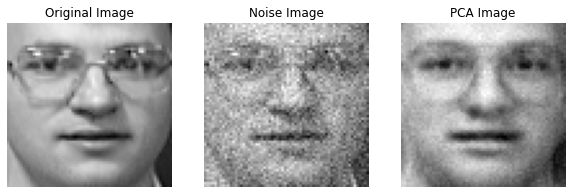

In [29]:
fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=3)

ax[0].set_title('Original Image')
ax[0].imshow(np.reshape(faces.data[50], (64,64)), cmap='gray')
ax[0].axis('off')

ax[1].set_title('Noise Image')
ax[1].imshow(np.reshape(facesNoise[50], (64,64)), cmap='gray')
ax[1].axis('off')

ax[2].set_title('PCA Image')
ax[2].imshow(np.reshape(facesRecons[50], (64,64)), cmap='gray')
ax[2].axis('off')

plt.show()

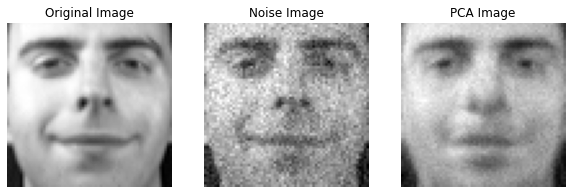

In [30]:
num = np.random.randint(0, 400, 1)

fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=3)

ax[0].set_title('Original Image')
ax[0].imshow(np.reshape(faces.data[num], (64,64)), cmap='gray')
ax[0].axis('off')

ax[1].set_title('Noise Image')
ax[1].imshow(np.reshape(facesNoise[num], (64,64)), cmap='gray')
ax[1].axis('off')

ax[2].set_title('PCA Image')
ax[2].imshow(np.reshape(facesRecons[num], (64,64)), cmap='gray')
ax[2].axis('off')

plt.show()

**THANK YOU**